## Math 428, Midterm Exam
### Problem #2

In [6]:
import numpy as np
np.set_printoptions(precision = 25)
import matplotlib.pyplot as plt
import warnings
import cmath
warnings.filterwarnings("ignore")
colors = ['red', 'blue', 'green', 'black', 'orange', 'purple']
step_size = 1e-2

# Generic Function to create arbitrary plots with arbitrary subplots and functions
def create_plot(x, y, xLabel=["X-Values"], yLabel=["Y-Values"],
                title=["Plot"], num_rows=1, size=(18, 14), y_lim=[None, None], roots=None):
    plt.figure(figsize=size, dpi=300)
    for c, (x_vals, y_vals, x_labels, y_labels, titles) in enumerate(
        zip(x, y, xLabel, yLabel, title)):
        for c2, (y_v, t) in enumerate(zip(y_vals, titles)):
            plt.subplot(num_rows, 1, c + 1)
            plt.autoscale(True, 'y') # Reset old scaling
            plt.ylim(y_lim[0], y_lim[1]) # Apply new scaling if necessary
            # Add a plot to the subplot, use transparency so they can both be seen
            plt.plot(x_vals, y_v, label=t, color=colors[c2], alpha=0.70)
            if roots:
                tmp = [root for root in roots if root.imag == 0]
                for root in tmp:
                    plt.axvline(x=root)
            plt.ylabel(y_labels)
            plt.xlabel(x_labels)
            plt.grid(True)
            plt.legend(loc='upper right')
    
    plt.show()

#### Function defintion of $G(x)$

In [3]:
x_vals = np.arange(0, 10000 + step_size, step_size)
def g_x(x):
    a   = -1.230e0
    b   = 3.686e-4
    c_1 = 3.658e4
    c_2 = 2.387e3
    d   = 3.742e3
    e   = 2.232e4
    f   = 9.303e2
    
    return (e/(x-(x-c_1) / d*x*(a+b*x))) + (f/(x-(x-c_2)/d*x*(a+b*x))-1)
    
    return pt_1 + pt_2 -1

### Question #1
The following plot has vertical lines where the asymptotes are. Although they _visually_ cross the x-axis, they are not actually roots and should thus be ignored. I found the roots of this function using WolframAlpha's Mathematica package, and simply filtered out all the values that were not in the range $0 < x < 10000$.

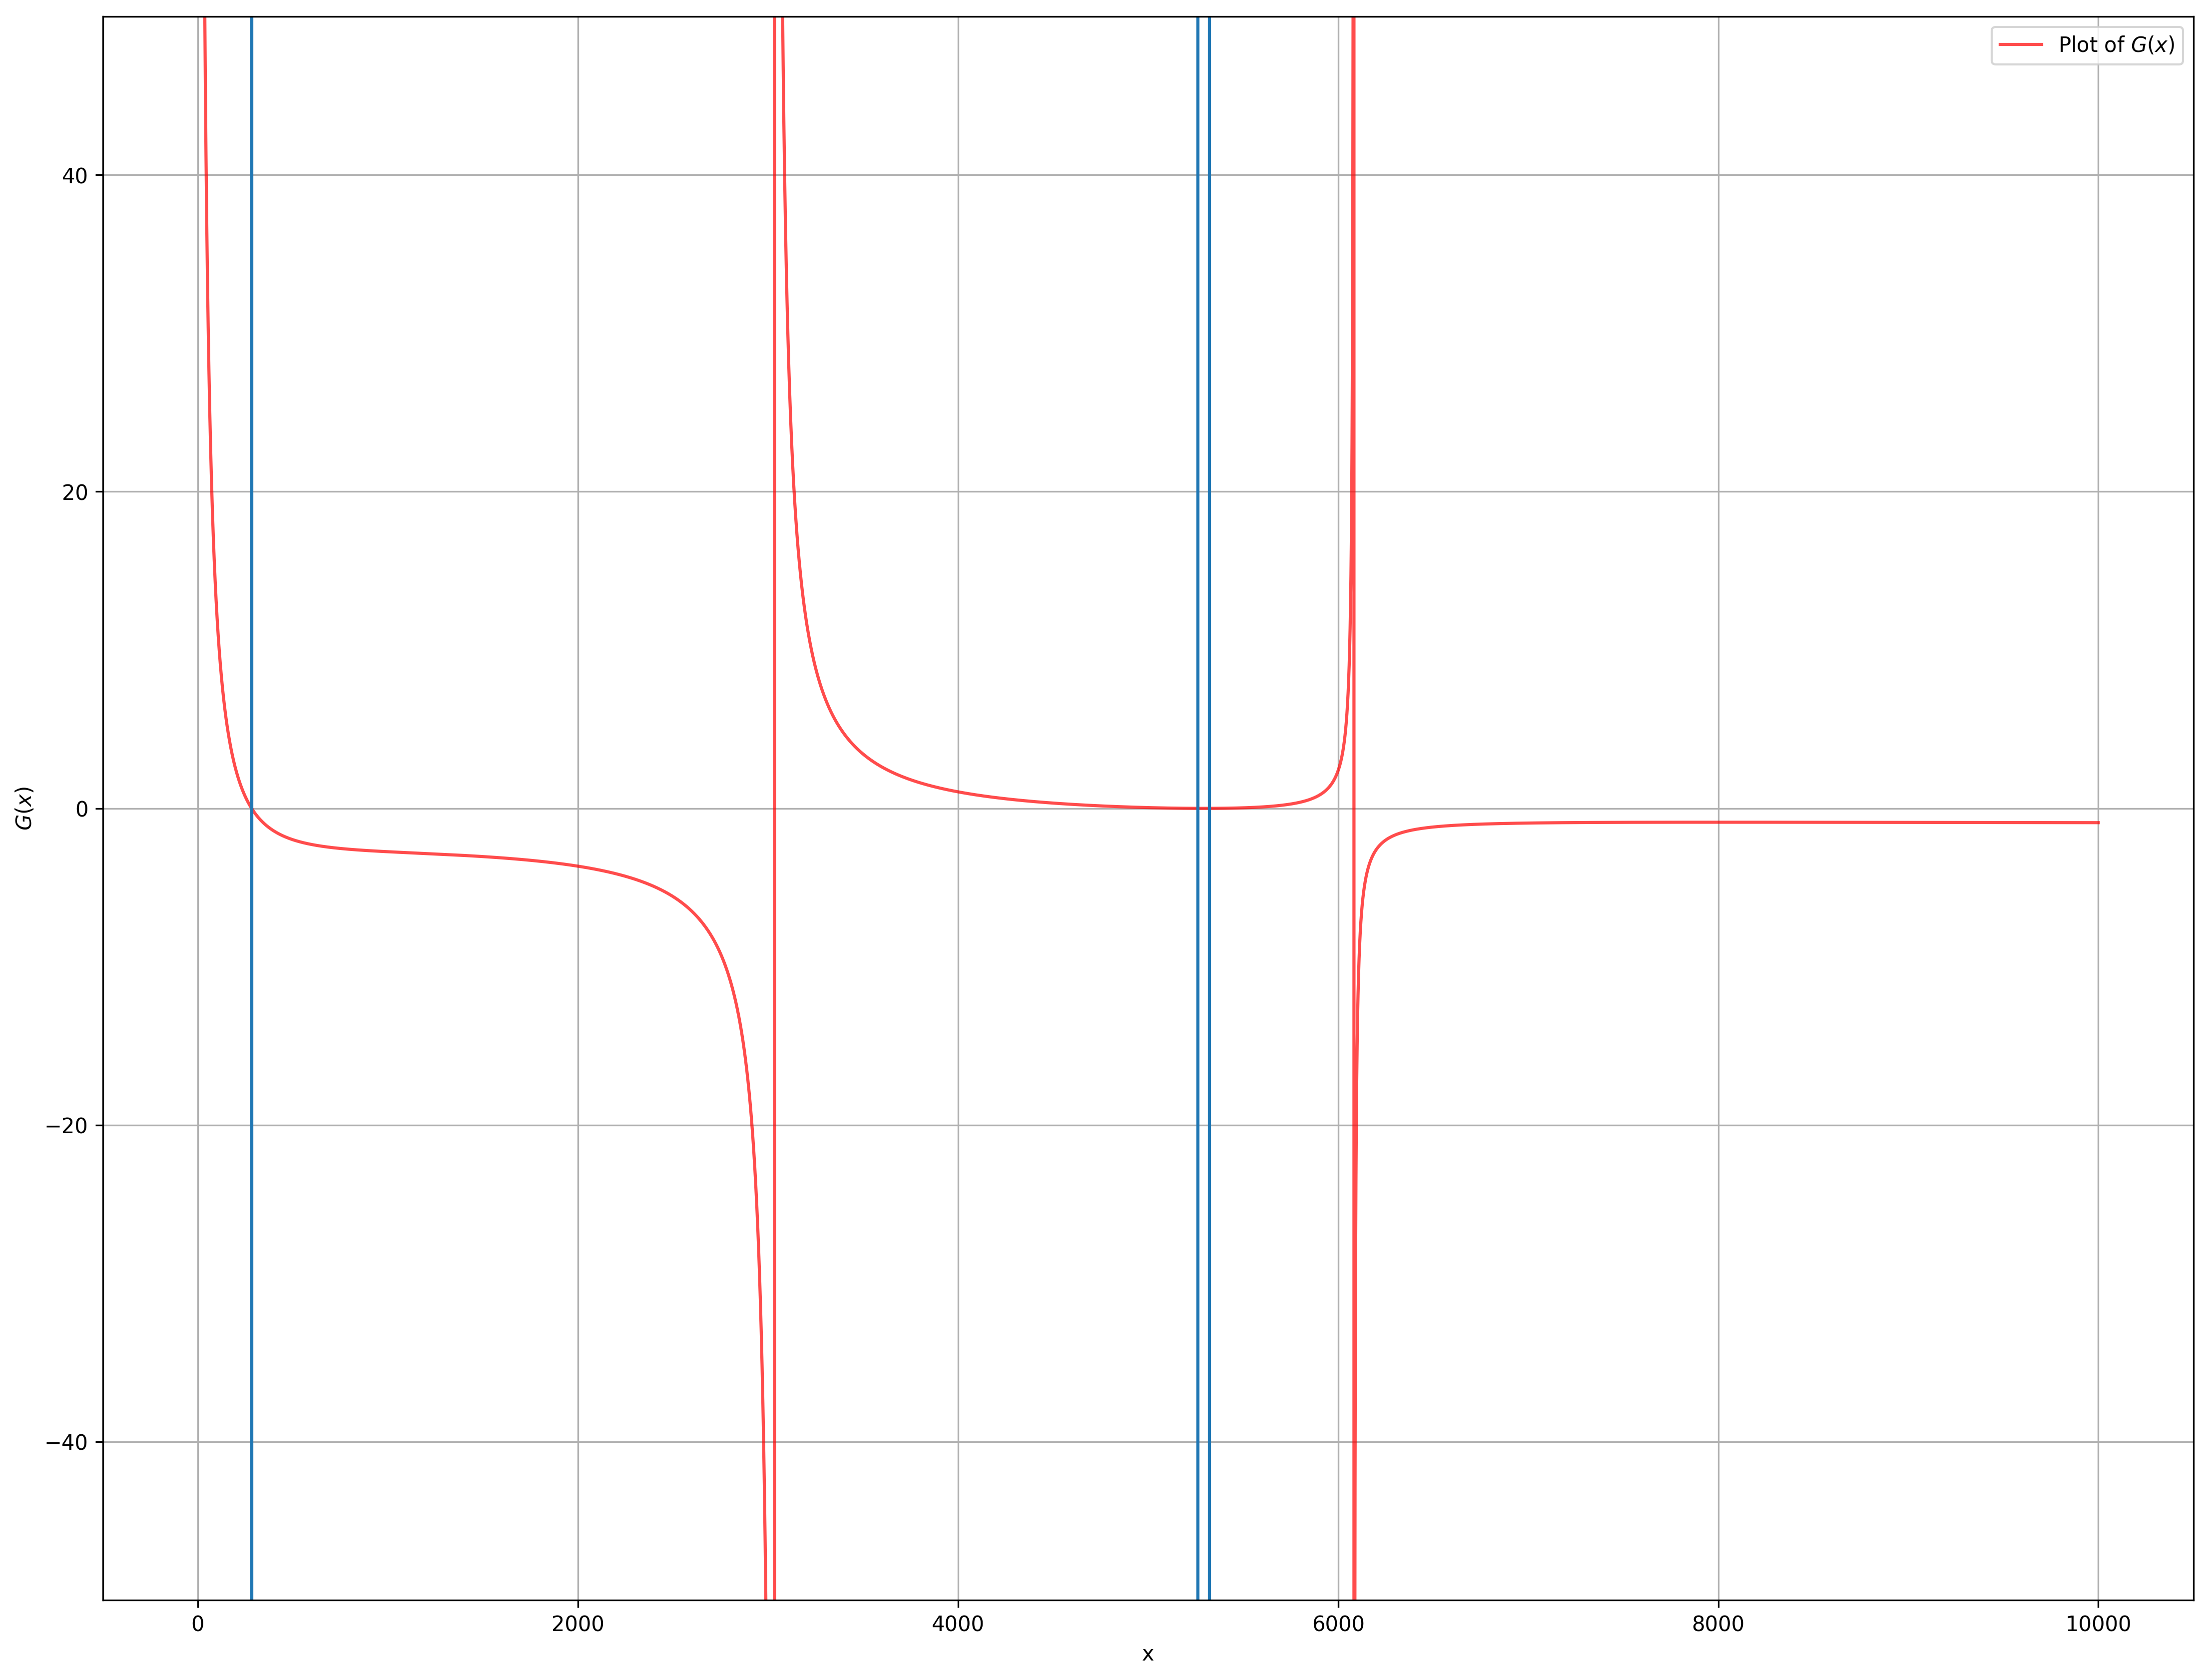

In [7]:
roots = [283.225, 5262.66, 5323.8] # Found using WolframAlpha's Mathematica
create_plot([x_vals], [(g_x(x_vals), )], ["x"],
            ["$G(x)$"], [("Plot of $G(x)$", )], 1,
            y_lim=[-50, 50], roots=roots)

### Question #2
I'll be using the modified secant method for this problem. My reasoning for this was more a process of elimination than anything else. In order to implement the Newton-Rhapson method, the derivative of the function must be computed, and rather than relying on either auxillary software or my hand-calculations to compute that (as it is fairly complicated), I decided to not consider the Newton-Rhapson method. Left with either the secant or modified secant method, I chose the modified secant method because it should produce a much better approximation of the derivative of the function, and is relatively easy to implement (and, as a bonus, I don't need to provide two initial guesses).

### Question #3
#### Implementation of the modified secant method of root finding

In [66]:
def modified_secant(func, x_initial, delta=0.01, max_rel_error=0.00001, max_iters=1000):
    x_vals  = [x_initial] # List of the approximations of the root
    rel_err = [1] # The relative error of the approximation
    iters   = 0 # Number of iterations
    
    # While the program hasn't looped too much, and the relative error isn't small enough
    while iters < max_iters and rel_err[-1] >= max_rel_error:
        iters  = iters + 1
        
        # Compute the next guess of the root
        approx_top = delta * x_vals[-1] * func(x_vals[-1])
        approx_bot = func(x_vals[-1] + delta * x_vals[-1]) - func(x_vals[-1])
        next_x = x_vals[-1] - approx_top / approx_bot
        x_vals.append(next_x)
        
         # Compute the relative error
        rel_err.append(abs((x_vals[-1] - x_vals[-2]) / x_vals[-1]))
        
    return (x_vals, rel_err, iters)

#### Using the modified secant method to find each of the roots of $G(x)$

In [94]:
# Find the roots of the g_x function with the modified secant method written above
max_error = 0.00001
root_1, err_1, iters_1 = modified_secant(g_x, 200, 0.001, max_error)
root_2, err_2, iters_2 = modified_secant(g_x, 5000, 0.001, max_error)
root_3, err_3, iters_3 = modified_secant(g_x, 6000, 0.001, max_error)
print ("Roots:\t\t\tRelative Error:\t\t\tRE Less than 0.00001?\n",
       root_1[-1], "\t", err_1[-1], "\t", (err_1[-1] < max_error), "\n",
       root_2[-1], "\t", err_2[-1], "\t\t", (err_1[-1] < max_error), "\n",
       root_3[-1], "\t", err_3[-1], "\t", (err_1[-1] < max_error))

Roots:			Relative Error:			RE Less than 0.00001?
 283.22494920685557 	 1.8102662618770673e-07 	 True 
 5262.659211321554 	 7.538805337406939e-06 		 True 
 5323.800497434899 	 1.3857952864025386e-06 	 True


Clearly, my modified secant method of root finding was able to find all the real roots of the function in the given range, and for each root the relative error is less than 0.00001 (as shown in the third column).
### Question #4
#### How poor initial guesses can fail to find the smallest root of $G(x)$

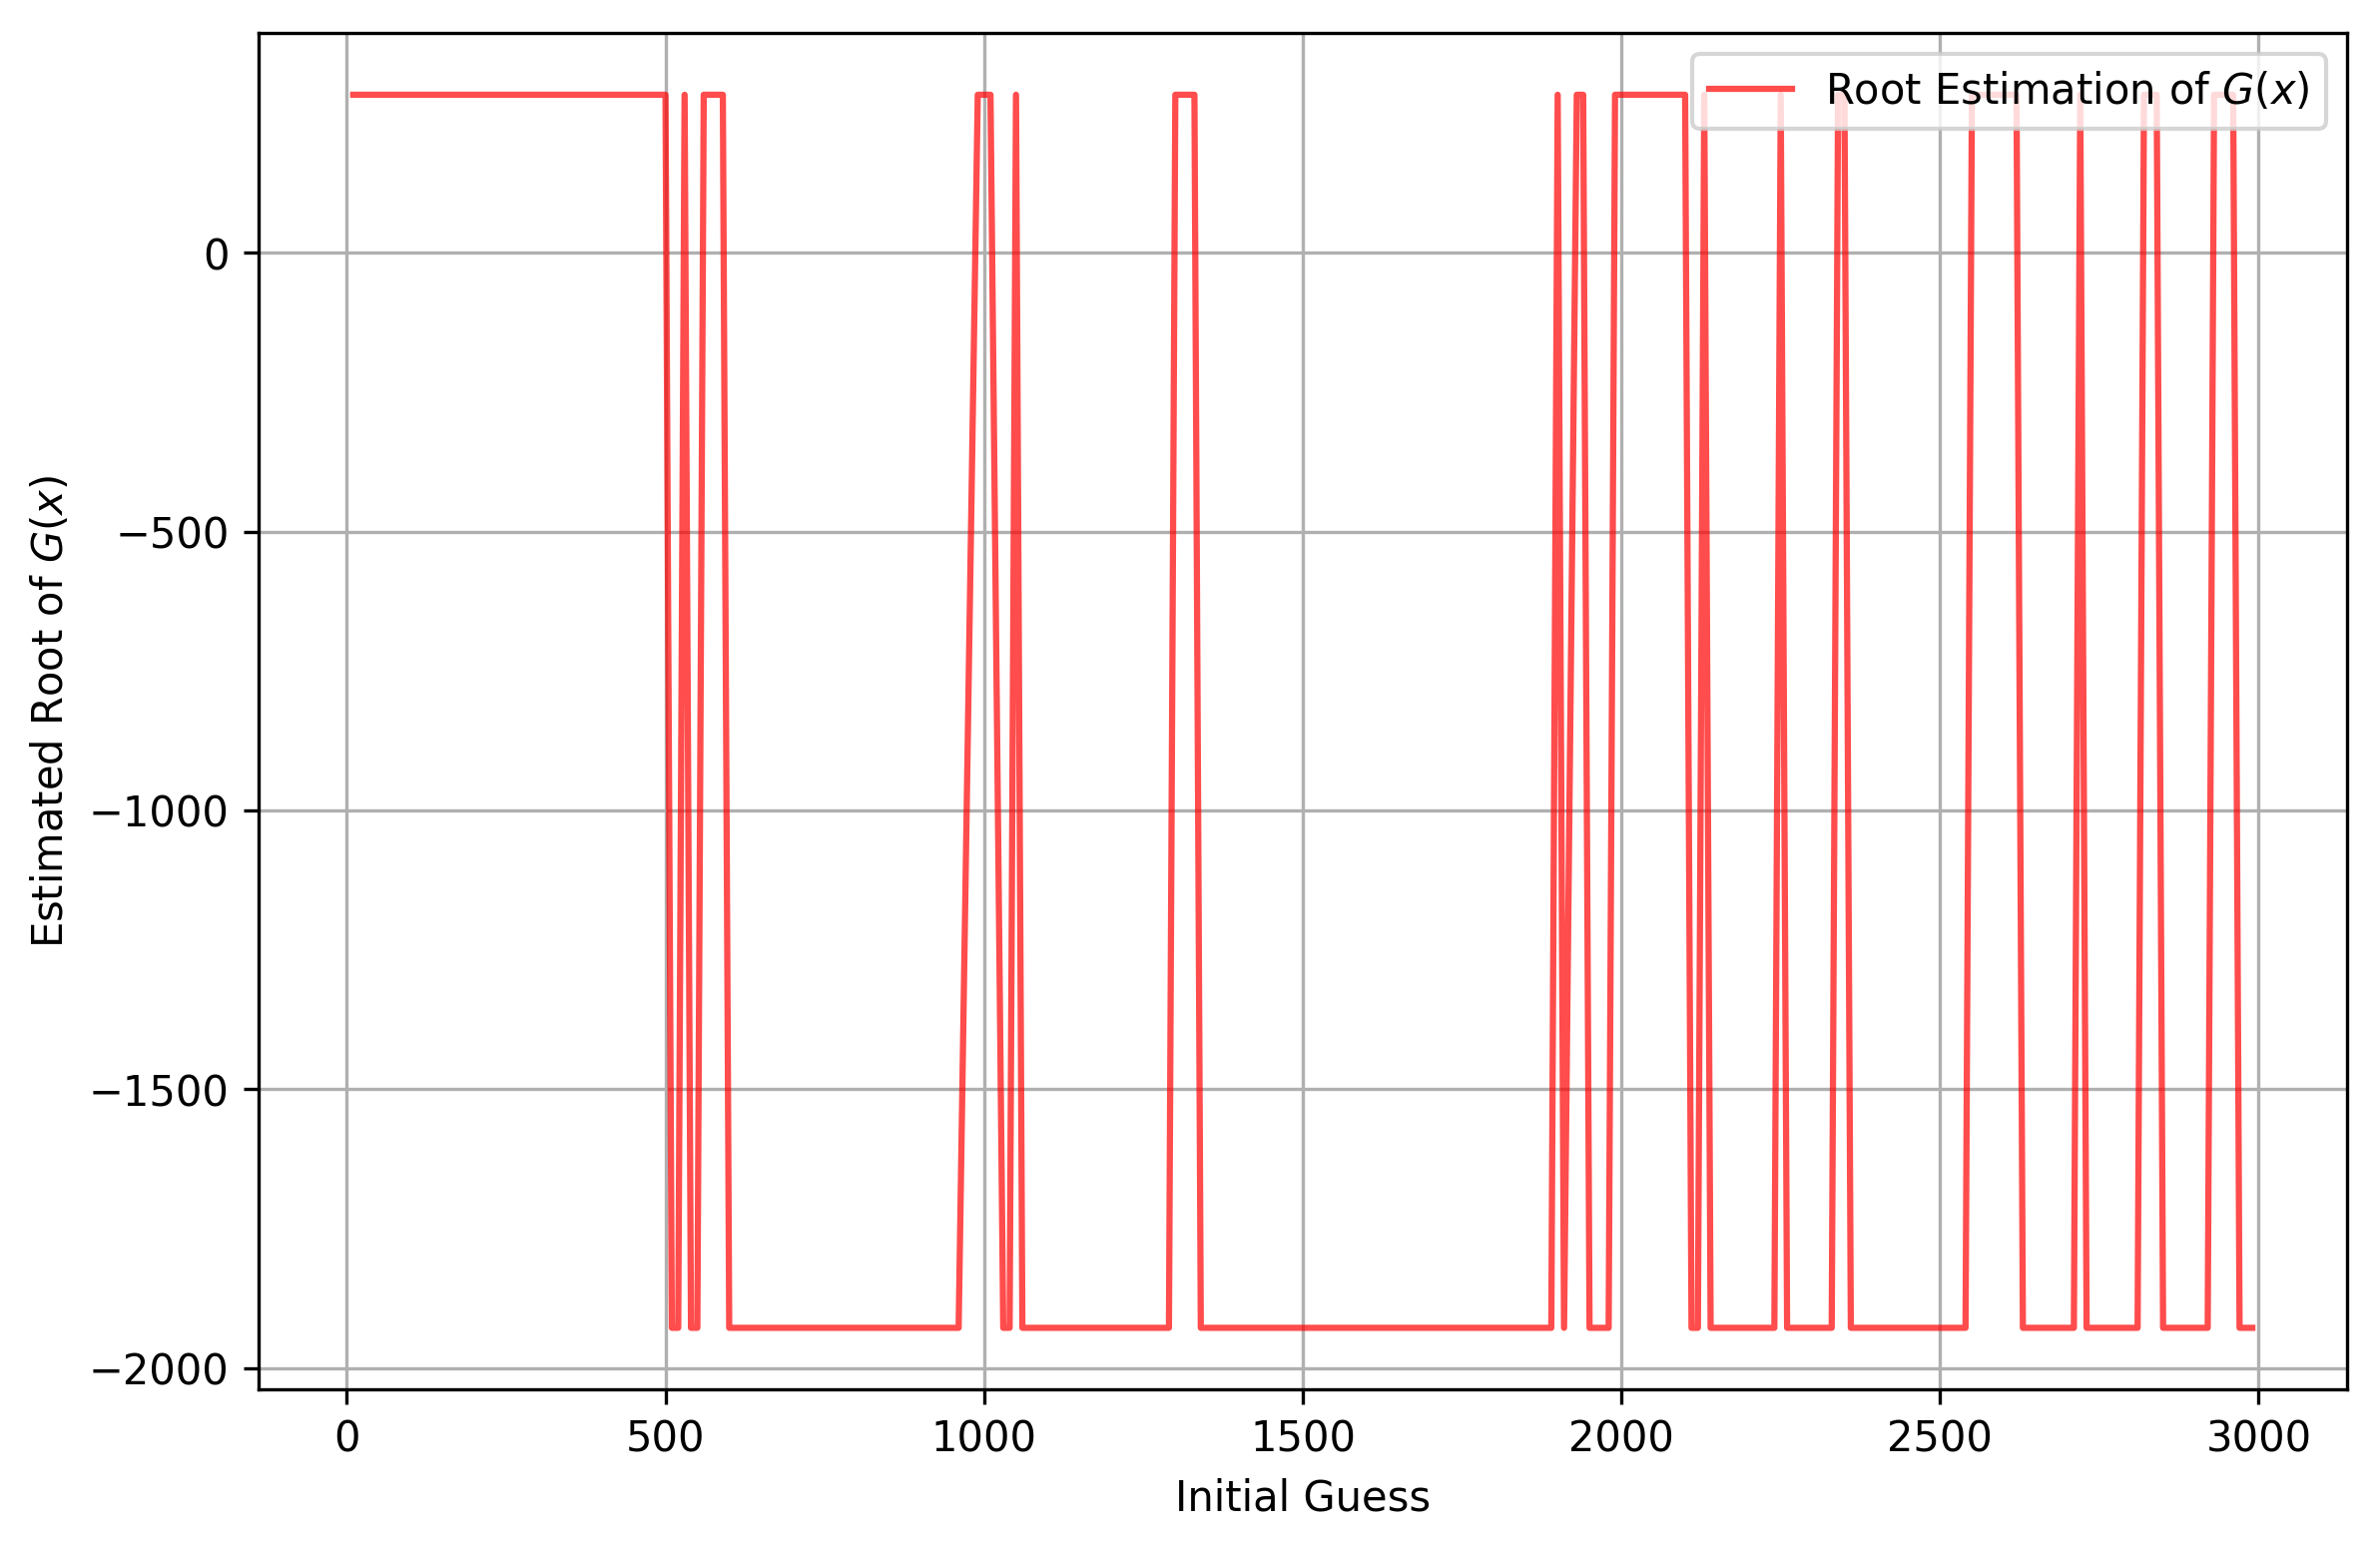

In [131]:
initials = [] # List of initial guesses
roots = [] # List of the resulting root estimation using the modified secant method
# Calculate the estimated root for guesses between 0 and 3000 in increments of 50
for initial in np.arange(0, 3000, 10):
    initials.append(initial)
    roots.append(modified_secant(g_x, initial, 0.001, max_error)[0][-1])
    if not np.isfinite(roots[-1]): # Remove all errored values
        del initials[-1]
        del roots[-1]
  
create_plot([initials], [(roots, )], ["Initial Guess"], ["Estimated Root of $G(x)$"],
            [("Root Estimation of $G(x)$", )], num_rows=1, size=(9, 6))

The above code and attached graph show how my modified secant method performs in finding the root of $G(x)$ for different initial guesses. I've plotted guesses between 0 and 3000 in increments of 10. Clearly, for guesses below (roughly) 500, the algorithm performs as expected, and the lowest root of 283.225 is found. But, if the initial guess is above 500, the algorithm finds the root at -1928.05, which is beyond the bounds of the problem. This happens for many ranges of guesses (as shown above), but clearly the method behaves erratically at values far from the first root, but not near enough to the second and third root. This happens because of the function $G(x)$, and how the modified secant method approximates each sequential term ($x_i$). Unlike bounded methods (like bisection) the modified secant method simply uses the approximate derivative of the function to estimate the next point / guess of the root. As can be seen in the graph of $G(x)$ above, for values past the root, this can lead to the method extrapolating the curve out beyond 0 to the negative roots, thereby skipping the first root we actually care about. Hence, having a poor initial guess for this first root can easily lead to divergence from the root we're trying to find, even though it's technically closer than the negative root.